In [28]:
pip install colormap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
pip install easydev --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Defining Similarity Measures**

In [30]:
import skimage.io
from matplotlib import pyplot as plt
from colormap import rgb2hex
import numpy as np
from math import exp
from scipy.sparse.linalg import eigsh
import skimage.transform
import colorsys
import math



 
def find_similarity_weight(pixel1,  pixel2):
    sigma_i = 5
 
    pixel1_bright = pixel1
    pixel2_bright = pixel2

    bright_dist = (pixel1_bright - pixel2_bright)**2

    wij = exp(-bright_dist/sigma_i) 
    return wij

    #return 0
  
def find_weight_matrix(image):

    
    h,w = image.shape
    W = np.zeros([h*w, h*w])
    image = image.flatten()
  
    for i in range(h*w):
        for j in range(h*w):
            
            W[i, j] = find_similarity_weight(image[i],  image[j])
            W[j, i] = W[i, j]

    return W

def get_similarity_color(p1, p2):
    sigmaI = 10
    h1,s1,v1 = colorsys.rgb_to_hsv(p1[0], p1[1], p1[2])
    Feature1 = np.array([v1, v1* s1*math.sin(h1), v1* s1*math.cos(h1) ])

    h2,s2,v2 = colorsys.rgb_to_hsv(p2[0], p2[1], p2[2])
    Feature2 = np.array([v2, v2* s2*math.sin(h2), v2* s2*math.cos(h2) ])

    FeatSim = np.linalg.norm(Feature1 - Feature2)
    return exp(-FeatSim ** 2/ sigmaI)



def find_W(image):
    

    R = image[:, :, 0].flatten()
    G = image[:, :, 1].flatten()
    B = image[:, :, 2].flatten()

    pixels_flattened = np.zeros([R.shape[0], 3]).astype(int)

    pixels_flattened[:, 0] = R
    pixels_flattened[:, 1] = G
    pixels_flattened[:, 2] = B

    W = np.zeros([R.shape[0], R.shape[0]])

   
    for i in range(R.shape[0]):
        for j in range(i+1):
            W[i, j] = get_similarity_color(pixels_flattened[i], pixels_flattened[j])
            W[j, i] = W[i, j]

    return W


In [31]:


def segment_image(img, similarity):
    
    if similarity == 1:
      W = find_weight_matrix(img)
    elif similarity == 2:
      W = find_W(img)  

    D = np.zeros(W.shape)
    for i in range(W.shape[0]):
      D[i, i] = np.sum(W[i, :])

    A = D - W
    B = D
    eigvals, eigvecs = eigsh(A, 2, M=B, sigma=None, which='SM')
    second_smallest = eigvecs[:, 1] > 0

    segmented_img = second_smallest.reshape((img.shape[0], img.shape[1]))
    plt.imshow(segmented_img, cmap='viridis')
    plt.show()


In [32]:
import scipy.ndimage

## **Reading The Images**

In [33]:

img = '/content/test1.png'
img1 = (skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))).astype(float)
img1_rotated = (skimage.transform.rotate((skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))),20)).astype(float)
img1_blurred = (scipy.ndimage.gaussian_filter(skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255)),1)).astype(float)


new_shape = (100,100)
img = '/content/test2.jpg'
img2 = (skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))).astype(float)
img2 = skimage.transform.resize(image=img2, output_shape=new_shape)
img2_rotated = skimage.transform.resize(image=(skimage.transform.rotate((skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))),20)).astype(float), output_shape = new_shape)
img2_blurred = skimage.transform.resize(image=(scipy.ndimage.gaussian_filter(skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255)),1)).astype(float), output_shape = new_shape)


img = '/content/test3.jpg'
img3 = (skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))).astype(float)
img3 = skimage.transform.resize(image=img3, output_shape=new_shape)
img3_rotated = skimage.transform.resize(image=(skimage.transform.rotate((skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))),20)).astype(float), output_shape = new_shape)
img3_blurred = skimage.transform.resize(image=(scipy.ndimage.gaussian_filter(skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255)),1)).astype(float), output_shape = new_shape)


img = '/content/test4.jpg'
img4 = (skimage.color.rgb2gray(skimage.io.imread(img)[:, :, :3] * 255)).astype(float)
img4 = skimage.transform.resize(image=img4, output_shape=new_shape)
img4_rotated = skimage.transform.resize(image=(skimage.transform.rotate((skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))),20)).astype(float), output_shape = new_shape)
img4_blurred = skimage.transform.resize(image=(scipy.ndimage.gaussian_filter(skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255)),1)).astype(float), output_shape = new_shape)


img = '/content/test5.jpg'
img5 = (skimage.color.rgb2gray(skimage.io.imread(img)[:, :, :3] * 255)).astype(float)
img5 = skimage.transform.resize(image=img5, output_shape=new_shape)
img5_rotated = skimage.transform.resize(image=(skimage.transform.rotate((skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255))),20)).astype(float), output_shape = new_shape)
img5_blurred = skimage.transform.resize(image=(scipy.ndimage.gaussian_filter(skimage.color.rgb2gray((skimage.io.imread(img)[:, :, :3] * 255)),1)).astype(float),  output_shape = new_shape)

## **Segmenting Images Using NCut**

Test Image 1



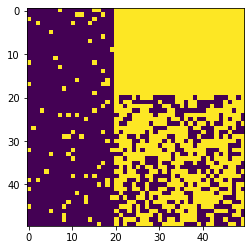

Test Image 2



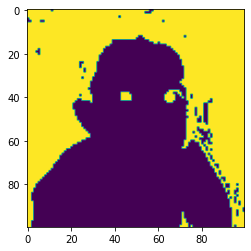

Test Image 3



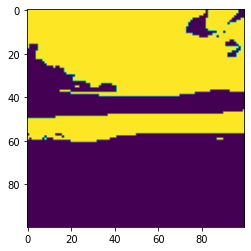

Test Image 4



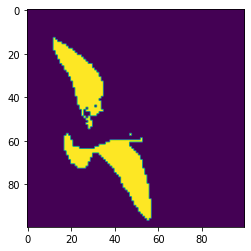

Test Image 5



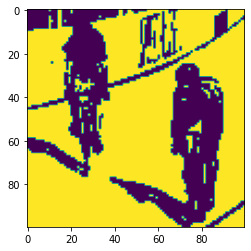

In [34]:
print("Test Image 1\n")
segment_image(img1,1)  # 1 represents similarity measure of intensities
print("Test Image 2\n")
segment_image(img2,1)
print("Test Image 3\n")
segment_image(img3,1)
print("Test Image 4\n")
segment_image(img4,1)
print("Test Image 5\n")
segment_image(img5,1)


## **(a) Rotated Images** 

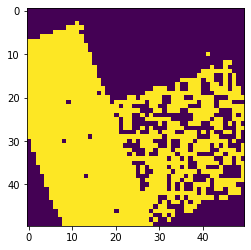

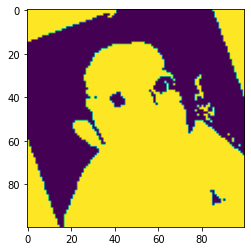

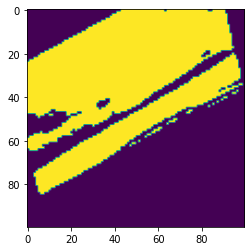

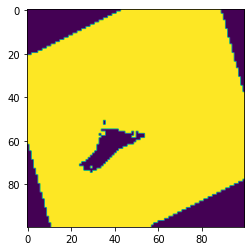

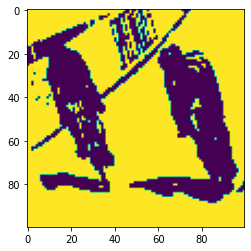

In [35]:

segment_image(img1_rotated,1) # 1 represents similarity measure of intensities

segment_image(img2_rotated,1)

segment_image(img3_rotated,1)

segment_image(img4_rotated,1)

segment_image(img5_rotated,1)

## **(b) Gaussian Blurred** 

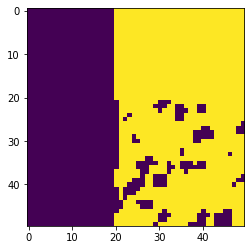

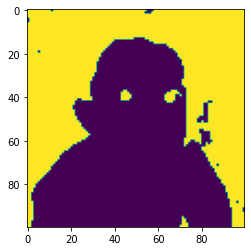

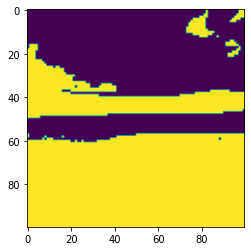

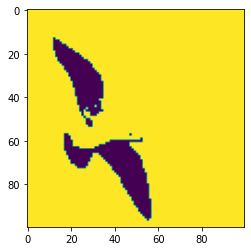

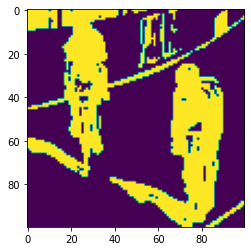

In [36]:

segment_image(img1_blurred,1)

segment_image(img2_blurred,1)

segment_image(img3_blurred,1)

segment_image(img4_blurred,1)

segment_image(img5_blurred,1)

## **Segmentation Using NCut Color Similarity**

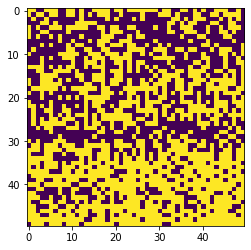

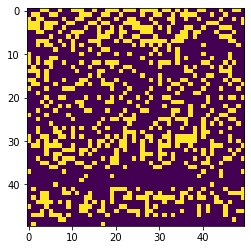

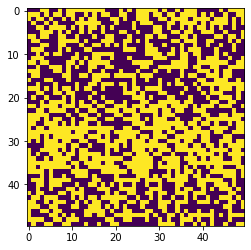

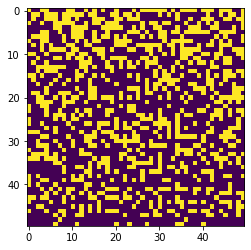

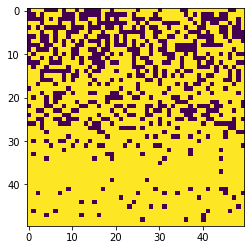

In [38]:

segment_image(( skimage.transform.resize(image=skimage.io.imread('/content/test1.png')[:, :, :3] * 255,output_shape=(50,50)).astype(float)),2)
segment_image(( skimage.transform.resize(image=skimage.io.imread('/content/test2.jpg')[:, :, :3] * 255,output_shape=(50,50)).astype(float)),2)
segment_image(( skimage.transform.resize(image=skimage.io.imread('/content/test3.jpg')[:, :, :3] * 255,output_shape=(50,50)).astype(float)),2)
segment_image(( skimage.transform.resize(image=skimage.io.imread('/content/test4.jpg')[:, :, :3] * 255,output_shape=(50,50)).astype(float)),2)
segment_image(( skimage.transform.resize(image=skimage.io.imread('/content/test5.jpg')[:, :, :3] * 255,output_shape=(50,50)).astype(float)),2)